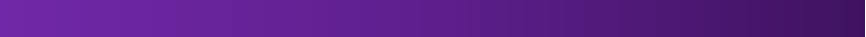


#     Entrainement de ENOVA&BOT 

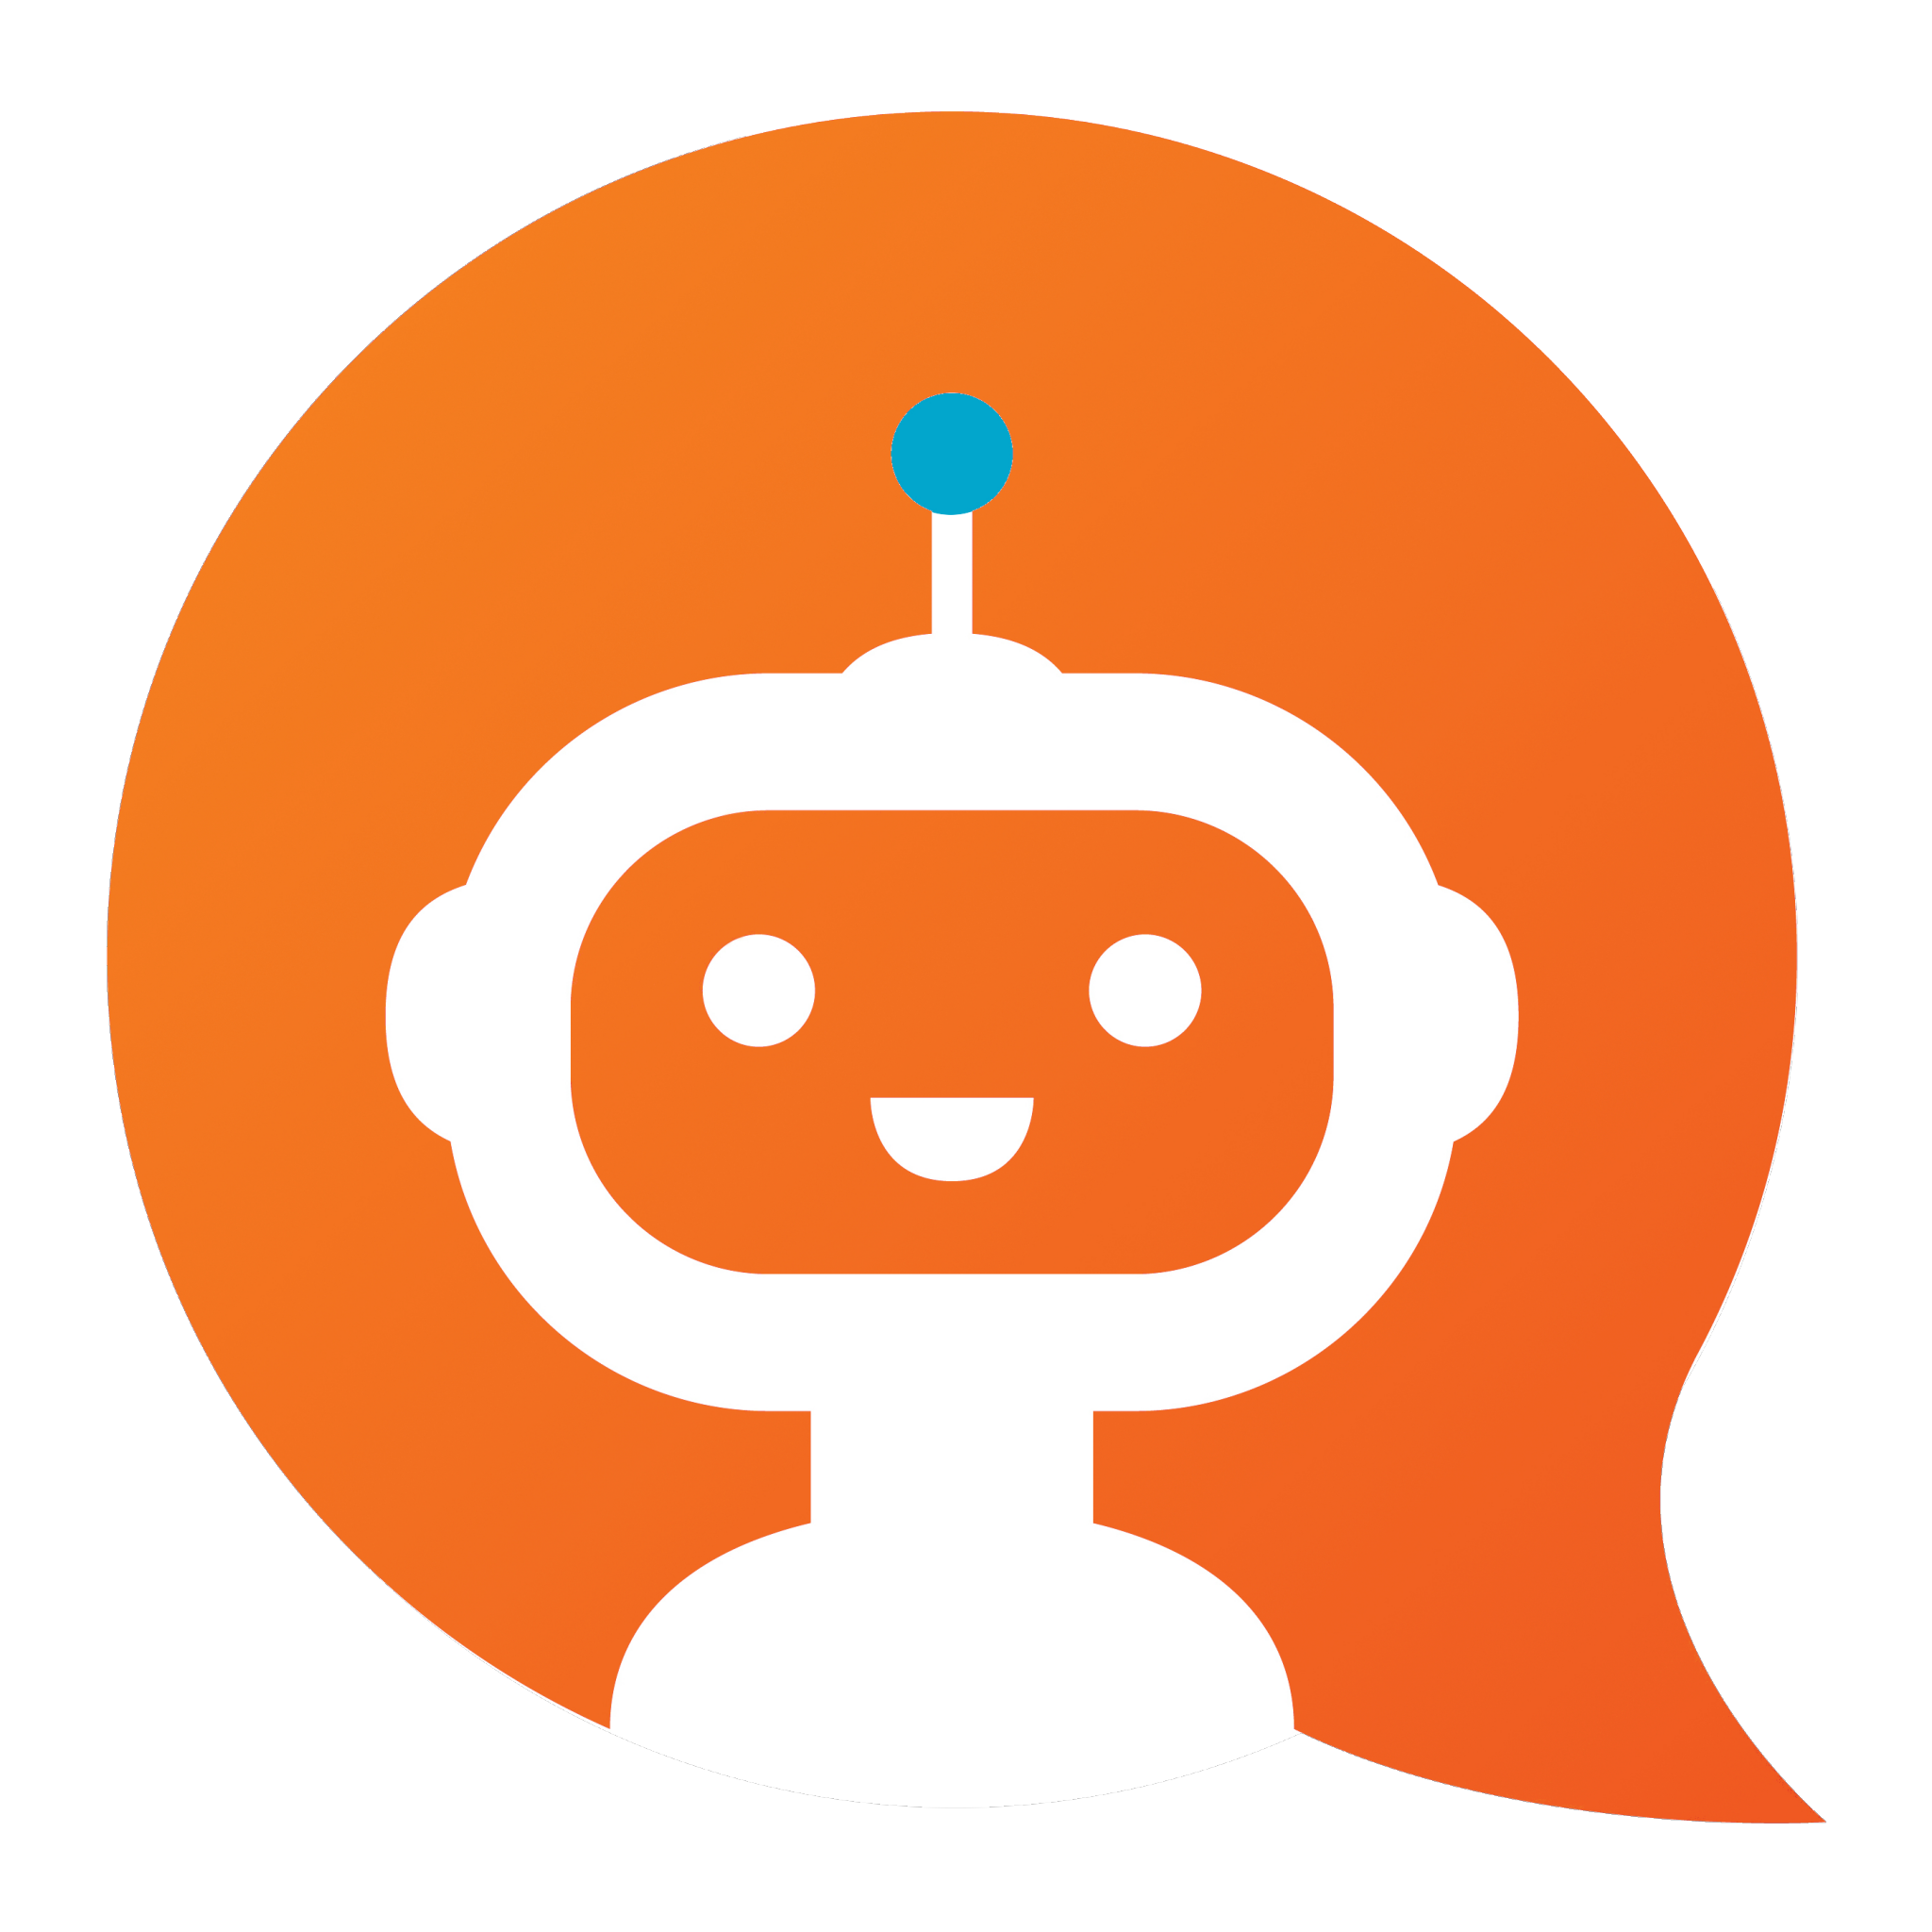

## Importation des biblios:
    Dans ce notebook, je vais entrainer ENOVA BOT 
    -----------------------------------------------------------------------------------------------------------------------

In [1]:
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
import json
import random
import numpy as np
import pickle
from keras.models import Sequential
from keras.layers import Dense, Activation,Dropout
from keras.optimizers import SGD
import joblib
import matplotlib.pyplot as plt

In [2]:
nltk.download('punkt')
nltk.download('omw-1.4')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

## Modèle de langue francaise:
    on va utiliser le fichier intents-fr.json pour la langue francaise
    -----------------------------------------------------------------------------------------------------------------------

In [3]:
# Initialisation des variables
mots = []
classes_fr = []
documents = []
ignore_words = ['?', '!','""','*']

# Initialisation du lemmatizer
lemmatizer = WordNetLemmatizer()

# Chargement des données depuis le fichier intents.json
with open('intents-fr.json', 'r') as file:
    intents = json.load(file)

# Prétraitement des données d'intention
for intent in intents['intents']:
    for pattern in intent['patterns']:
        w = nltk.word_tokenize(pattern)  # Tokenisation des mots
        mots.extend(w)
        documents.append((w, intent['tag']))

        if intent['tag'] not in classes_fr:
            classes_fr.append(intent['tag'])

# Prétraitement des mots
mots = [lemmatizer.lemmatize(w.lower()) for w in mots if w not in ignore_words]
mots = sorted(list(set(mots)))

# Sérialisation des données
pickle.dump(mots, open('mots.pkl', 'wb'))
pickle.dump(classes_fr, open('classes-fr.pkl', 'wb'))

# Création des données d'entraînement
training = []
output_empty = [0] * len(classes_fr)
for doc in documents:
    bag = [1 if w in doc[0] else 0 for w in mots]
    
    output_row = list(output_empty)
    output_row[classes_fr.index(doc[1])] = 1
    
    training.append([bag, output_row])

random.shuffle(training)

# Divisez les données en train_x et train_y
train_x = np.array([i[0] for i in training])
train_y = np.array([i[1] for i in training])

# Création du modèle du chatbot
model_fr = Sequential()
model_fr.add(Dense(128, input_shape=(len(train_x[0]),), activation='tanh'))
model_fr.add(Dense(64, activation='tanh'))
#model_fr.add(Dense(32, activation='tanh'))
model_fr.add(Dense(len(train_y[0]), activation='softmax'))

sgd = SGD(learning_rate=0.01, momentum=0.9, nesterov=True)
model_fr.compile(loss='categorical_crossentropy',optimizer=sgd,  metrics=['accuracy'])

# Entraînement du modèle
hist = model_fr.fit(train_x, train_y, epochs=1000, batch_size=5, verbose=1)

# Sauvegarde du modèle et de l'historique
#model.save('ENOVA_BOT.h5')
joblib.dump(model_fr, 'ENOVA_BOT_fr.joblib')
print("Modèle créé avec succès.")


Epoch 1/1000
51/51 [==============================] - 2s 3ms/step - loss: 3.9644 - accuracy: 0.0598
Epoch 2/1000
51/51 [==============================] - 0s 3ms/step - loss: 3.7038 - accuracy: 0.1076
Epoch 3/1000
51/51 [==============================] - 0s 4ms/step - loss: 3.4445 - accuracy: 0.1633
Epoch 4/1000
51/51 [==============================] - 0s 4ms/step - loss: 3.1345 - accuracy: 0.2590
Epoch 5/1000
51/51 [==============================] - 0s 3ms/step - loss: 2.8023 - accuracy: 0.3586
Epoch 6/1000
51/51 [==============================] - 0s 3ms/step - loss: 2.4704 - accuracy: 0.4661
Epoch 7/1000
51/51 [==============================] - 0s 3ms/step - loss: 2.1645 - accuracy: 0.5578
Epoch 8/1000
51/51 [==============================] - 0s 3ms/step - loss: 1.8721 - accuracy: 0.6016
Epoch 9/1000
51/51 [==============================] - 0s 3ms/step - loss: 1.6243 - accuracy: 0.6534
Epoch 10/1000
51/51 [==============================] - 0s 4ms/step - loss: 1.4132 - accuracy: 0.7171

51/51 [==============================] - 0s 4ms/step - loss: 0.2123 - accuracy: 0.9084
Epoch 163/1000
51/51 [==============================] - 0s 4ms/step - loss: 0.2062 - accuracy: 0.9044
Epoch 164/1000
51/51 [==============================] - 0s 4ms/step - loss: 0.2144 - accuracy: 0.8964
Epoch 165/1000
51/51 [==============================] - 0s 4ms/step - loss: 0.2132 - accuracy: 0.8924
Epoch 166/1000
51/51 [==============================] - 0s 8ms/step - loss: 0.2139 - accuracy: 0.9044
Epoch 167/1000
51/51 [==============================] - 0s 5ms/step - loss: 0.2076 - accuracy: 0.8924
Epoch 168/1000
51/51 [==============================] - 0s 5ms/step - loss: 0.2110 - accuracy: 0.8845
Epoch 169/1000
51/51 [==============================] - 0s 6ms/step - loss: 0.2181 - accuracy: 0.8884
Epoch 170/1000
51/51 [==============================] - 0s 9ms/step - loss: 0.2112 - accuracy: 0.9044
Epoch 171/1000
51/51 [==============================] - 1s 13ms/step - loss: 0.2071 - accuracy: 0

51/51 [==============================] - 0s 4ms/step - loss: 0.2041 - accuracy: 0.8924
Epoch 323/1000
51/51 [==============================] - 0s 4ms/step - loss: 0.2046 - accuracy: 0.9044
Epoch 324/1000
51/51 [==============================] - 0s 4ms/step - loss: 0.2214 - accuracy: 0.9044
Epoch 325/1000
51/51 [==============================] - 0s 4ms/step - loss: 0.2030 - accuracy: 0.9084
Epoch 326/1000
51/51 [==============================] - 0s 4ms/step - loss: 0.2106 - accuracy: 0.9044
Epoch 327/1000
51/51 [==============================] - 0s 4ms/step - loss: 0.2101 - accuracy: 0.8964
Epoch 328/1000
51/51 [==============================] - 0s 4ms/step - loss: 0.2093 - accuracy: 0.8884
Epoch 329/1000
51/51 [==============================] - 0s 4ms/step - loss: 0.2038 - accuracy: 0.8964
Epoch 330/1000
51/51 [==============================] - 0s 3ms/step - loss: 0.1972 - accuracy: 0.9084
Epoch 331/1000
51/51 [==============================] - 0s 4ms/step - loss: 0.2086 - accuracy: 0.

51/51 [==============================] - 0s 4ms/step - loss: 0.2034 - accuracy: 0.8924
Epoch 483/1000
51/51 [==============================] - 0s 4ms/step - loss: 0.2166 - accuracy: 0.8964
Epoch 484/1000
51/51 [==============================] - 0s 4ms/step - loss: 0.1980 - accuracy: 0.8964
Epoch 485/1000
51/51 [==============================] - 0s 3ms/step - loss: 0.1977 - accuracy: 0.9044
Epoch 486/1000
51/51 [==============================] - 0s 4ms/step - loss: 0.2016 - accuracy: 0.9004
Epoch 487/1000
51/51 [==============================] - 0s 3ms/step - loss: 0.2031 - accuracy: 0.9004
Epoch 488/1000
51/51 [==============================] - 0s 4ms/step - loss: 0.2022 - accuracy: 0.8964
Epoch 489/1000
51/51 [==============================] - 0s 4ms/step - loss: 0.2003 - accuracy: 0.9044
Epoch 490/1000
51/51 [==============================] - 0s 4ms/step - loss: 0.2005 - accuracy: 0.9124
Epoch 491/1000
51/51 [==============================] - 0s 4ms/step - loss: 0.1987 - accuracy: 0.

51/51 [==============================] - 0s 4ms/step - loss: 0.1989 - accuracy: 0.9124
Epoch 643/1000
51/51 [==============================] - 0s 3ms/step - loss: 0.2033 - accuracy: 0.8924
Epoch 644/1000
51/51 [==============================] - 0s 4ms/step - loss: 0.1992 - accuracy: 0.8964
Epoch 645/1000
51/51 [==============================] - 0s 4ms/step - loss: 0.2070 - accuracy: 0.8845
Epoch 646/1000
51/51 [==============================] - 0s 4ms/step - loss: 0.1976 - accuracy: 0.9004
Epoch 647/1000
51/51 [==============================] - 0s 4ms/step - loss: 0.1973 - accuracy: 0.9044
Epoch 648/1000
51/51 [==============================] - 0s 4ms/step - loss: 0.1945 - accuracy: 0.9004
Epoch 649/1000
51/51 [==============================] - 0s 4ms/step - loss: 0.1990 - accuracy: 0.8924
Epoch 650/1000
51/51 [==============================] - 0s 3ms/step - loss: 0.1968 - accuracy: 0.9004
Epoch 651/1000
51/51 [==============================] - 0s 4ms/step - loss: 0.2027 - accuracy: 0.

51/51 [==============================] - 0s 4ms/step - loss: 0.1955 - accuracy: 0.8924
Epoch 803/1000
51/51 [==============================] - 0s 4ms/step - loss: 0.1975 - accuracy: 0.9084
Epoch 804/1000
51/51 [==============================] - 0s 4ms/step - loss: 0.2050 - accuracy: 0.9124
Epoch 805/1000
51/51 [==============================] - 0s 4ms/step - loss: 0.1984 - accuracy: 0.8964
Epoch 806/1000
51/51 [==============================] - 0s 4ms/step - loss: 0.1971 - accuracy: 0.9004
Epoch 807/1000
51/51 [==============================] - 0s 4ms/step - loss: 0.1961 - accuracy: 0.8924
Epoch 808/1000
51/51 [==============================] - 0s 4ms/step - loss: 0.1964 - accuracy: 0.8964
Epoch 809/1000
51/51 [==============================] - 0s 4ms/step - loss: 0.1962 - accuracy: 0.9004
Epoch 810/1000
51/51 [==============================] - 0s 3ms/step - loss: 0.2017 - accuracy: 0.8884
Epoch 811/1000
51/51 [==============================] - 0s 4ms/step - loss: 0.1949 - accuracy: 0.

51/51 [==============================] - 0s 4ms/step - loss: 0.1949 - accuracy: 0.8964
Epoch 963/1000
51/51 [==============================] - 0s 4ms/step - loss: 0.2039 - accuracy: 0.8884
Epoch 964/1000
51/51 [==============================] - 0s 4ms/step - loss: 0.1925 - accuracy: 0.9084
Epoch 965/1000
51/51 [==============================] - 0s 4ms/step - loss: 0.1935 - accuracy: 0.9044
Epoch 966/1000
51/51 [==============================] - 0s 4ms/step - loss: 0.1952 - accuracy: 0.8964
Epoch 967/1000
51/51 [==============================] - 0s 4ms/step - loss: 0.1974 - accuracy: 0.9004
Epoch 968/1000
51/51 [==============================] - 0s 3ms/step - loss: 0.1968 - accuracy: 0.8924
Epoch 969/1000
51/51 [==============================] - 0s 4ms/step - loss: 0.1963 - accuracy: 0.8964
Epoch 970/1000
51/51 [==============================] - 0s 4ms/step - loss: 0.2012 - accuracy: 0.8964
Epoch 971/1000
51/51 [==============================] - 0s 4ms/step - loss: 0.2004 - accuracy: 0.

In [4]:
len(train_y[0])

54

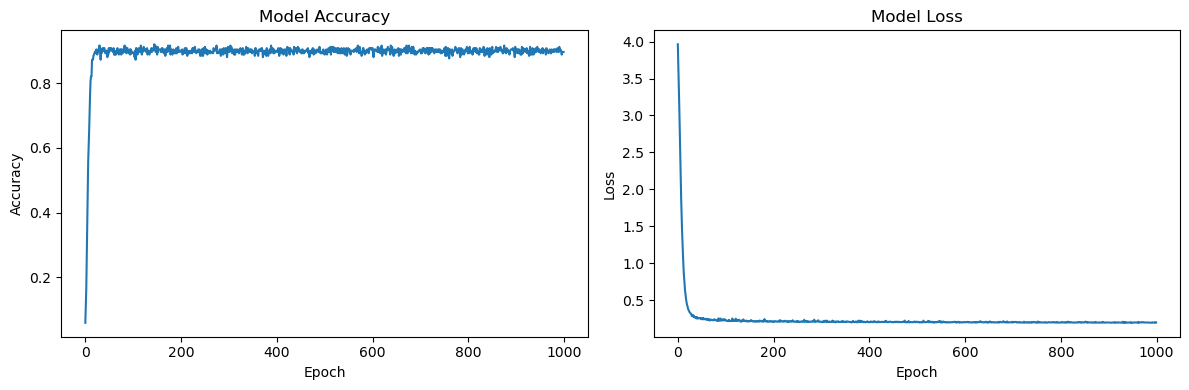

In [5]:
# Plot training accuracy
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(hist.history['accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')

# Plot training loss
plt.subplot(1, 2, 2)
plt.plot(hist.history['loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')

plt.tight_layout()
plt.show()


### Performances:
    
    -----------------------------------------------------------------------------------------------------------------------

## Modèle de langue anglais:
    on va utiliser le fichier intents.json pour la langue francaise
    -----------------------------------------------------------------------------------------------------------------------

In [6]:
# Initialisation des variables
words = []
classes_ang = []
documents = []
ignore_words = ['?', '!','""','*']

# Initialisation du lemmatizer
lemmatizer = WordNetLemmatizer()

# Chargement des données depuis le fichier intents.json
with open('intents-ang.json', 'r') as file:
    intents = json.load(file)

# Prétraitement des données d'intention
for intent in intents['intents']:
    for pattern in intent['patterns']:
        w = nltk.word_tokenize(pattern)  # Tokenisation des mots
        words.extend(w)
        documents.append((w, intent['tag']))

        if intent['tag'] not in classes_ang:
            classes_ang.append(intent['tag'])

# Prétraitement des mots
words = [lemmatizer.lemmatize(w.lower()) for w in words if w not in ignore_words]
words = sorted(list(set(words)))

# Sérialisation des données
pickle.dump(words, open('words.pkl', 'wb'))
pickle.dump(classes_ang, open('classes-ang.pkl', 'wb'))

# Création des données d'entraînement
training = []
output_empty = [0] * len(classes_ang)
for doc in documents:
    bag = [1 if w in doc[0] else 0 for w in words]
    
    output_row = list(output_empty)
    output_row[classes_ang.index(doc[1])] = 1
    
    training.append([bag, output_row])

random.shuffle(training)

# Divisez les données en train_x et train_y
train_x = np.array([i[0] for i in training])
train_y = np.array([i[1] for i in training])

# Création du modèle du chatbot
model_ang = Sequential()
model_ang.add(Dense(128, input_shape=(len(train_x[0]),), activation='tanh'))
model_ang.add(Dense(64, activation='tanh'))
model_ang.add(Dense(len(train_y[0]), activation='softmax'))

sgd = SGD(learning_rate=0.01, momentum=0.9, nesterov=True)
model_ang.compile(loss='categorical_crossentropy',optimizer=sgd,  metrics=['accuracy'])

# Entraînement du modèle
hist = model_ang.fit(train_x, train_y, epochs=1000, batch_size=5, verbose=1)

# Sauvegarde du modèle et de l'historique
#model.save('ENOVA_BOT.h5')
joblib.dump(model_ang, 'ENOVA_BOT_ang.joblib')
print("Modèle créé avec succès.")


Epoch 1/1000
45/45 [==============================] - 1s 3ms/step - loss: 3.8048 - accuracy: 0.0633
Epoch 2/1000
45/45 [==============================] - 0s 3ms/step - loss: 3.5279 - accuracy: 0.1131
Epoch 3/1000
45/45 [==============================] - 0s 3ms/step - loss: 3.2474 - accuracy: 0.1810
Epoch 4/1000
45/45 [==============================] - 0s 3ms/step - loss: 2.9504 - accuracy: 0.2353
Epoch 5/1000
45/45 [==============================] - 0s 4ms/step - loss: 2.6492 - accuracy: 0.3394
Epoch 6/1000
45/45 [==============================] - 0s 3ms/step - loss: 2.3546 - accuracy: 0.3982
Epoch 7/1000
45/45 [==============================] - 0s 3ms/step - loss: 2.0991 - accuracy: 0.4706
Epoch 8/1000
45/45 [==============================] - 0s 3ms/step - loss: 1.8495 - accuracy: 0.5656
Epoch 9/1000
45/45 [==============================] - 0s 3ms/step - loss: 1.6443 - accuracy: 0.5837
Epoch 10/1000
45/45 [==============================] - 0s 3ms/step - loss: 1.4673 - accuracy: 0.6516

45/45 [==============================] - 0s 3ms/step - loss: 0.2763 - accuracy: 0.8597
Epoch 163/1000
45/45 [==============================] - 0s 3ms/step - loss: 0.3010 - accuracy: 0.8733
Epoch 164/1000
45/45 [==============================] - 0s 3ms/step - loss: 0.3040 - accuracy: 0.8643
Epoch 165/1000
45/45 [==============================] - 0s 4ms/step - loss: 0.2956 - accuracy: 0.8552
Epoch 166/1000
45/45 [==============================] - 0s 3ms/step - loss: 0.2842 - accuracy: 0.8824
Epoch 167/1000
45/45 [==============================] - 0s 4ms/step - loss: 0.2787 - accuracy: 0.8552
Epoch 168/1000
45/45 [==============================] - 0s 3ms/step - loss: 0.2795 - accuracy: 0.8643
Epoch 169/1000
45/45 [==============================] - 0s 3ms/step - loss: 0.2805 - accuracy: 0.8643
Epoch 170/1000
45/45 [==============================] - 0s 3ms/step - loss: 0.2821 - accuracy: 0.8552
Epoch 171/1000
45/45 [==============================] - 0s 3ms/step - loss: 0.2810 - accuracy: 0.

45/45 [==============================] - 0s 3ms/step - loss: 0.2758 - accuracy: 0.8824
Epoch 323/1000
45/45 [==============================] - 0s 3ms/step - loss: 0.2722 - accuracy: 0.8688
Epoch 324/1000
45/45 [==============================] - 0s 3ms/step - loss: 0.2706 - accuracy: 0.8733
Epoch 325/1000
45/45 [==============================] - 0s 3ms/step - loss: 0.2729 - accuracy: 0.8688
Epoch 326/1000
45/45 [==============================] - 0s 3ms/step - loss: 0.2714 - accuracy: 0.8597
Epoch 327/1000
45/45 [==============================] - 0s 3ms/step - loss: 0.2754 - accuracy: 0.8597
Epoch 328/1000
45/45 [==============================] - 0s 3ms/step - loss: 0.2729 - accuracy: 0.8597
Epoch 329/1000
45/45 [==============================] - 0s 3ms/step - loss: 0.2769 - accuracy: 0.8778
Epoch 330/1000
45/45 [==============================] - 0s 3ms/step - loss: 0.2688 - accuracy: 0.8824
Epoch 331/1000
45/45 [==============================] - 0s 4ms/step - loss: 0.2679 - accuracy: 0.

45/45 [==============================] - 0s 3ms/step - loss: 0.2692 - accuracy: 0.8597
Epoch 483/1000
45/45 [==============================] - 0s 3ms/step - loss: 0.2667 - accuracy: 0.8462
Epoch 484/1000
45/45 [==============================] - 0s 3ms/step - loss: 0.2656 - accuracy: 0.8688
Epoch 485/1000
45/45 [==============================] - 0s 3ms/step - loss: 0.2683 - accuracy: 0.8824
Epoch 486/1000
45/45 [==============================] - 0s 3ms/step - loss: 0.2657 - accuracy: 0.8597
Epoch 487/1000
45/45 [==============================] - 0s 3ms/step - loss: 0.2619 - accuracy: 0.8643
Epoch 488/1000
45/45 [==============================] - 0s 3ms/step - loss: 0.2686 - accuracy: 0.8688
Epoch 489/1000
45/45 [==============================] - 0s 3ms/step - loss: 0.2650 - accuracy: 0.8688
Epoch 490/1000
45/45 [==============================] - 0s 3ms/step - loss: 0.2635 - accuracy: 0.8462
Epoch 491/1000
45/45 [==============================] - 0s 3ms/step - loss: 0.2632 - accuracy: 0.

45/45 [==============================] - 0s 3ms/step - loss: 0.2773 - accuracy: 0.8778
Epoch 643/1000
45/45 [==============================] - 0s 3ms/step - loss: 0.2810 - accuracy: 0.8733
Epoch 644/1000
45/45 [==============================] - 0s 3ms/step - loss: 0.2744 - accuracy: 0.8462
Epoch 645/1000
45/45 [==============================] - 0s 3ms/step - loss: 0.2610 - accuracy: 0.8733
Epoch 646/1000
45/45 [==============================] - 0s 4ms/step - loss: 0.2606 - accuracy: 0.8597
Epoch 647/1000
45/45 [==============================] - 0s 4ms/step - loss: 0.2604 - accuracy: 0.8733
Epoch 648/1000
45/45 [==============================] - 0s 3ms/step - loss: 0.2608 - accuracy: 0.8597
Epoch 649/1000
45/45 [==============================] - 0s 3ms/step - loss: 0.2610 - accuracy: 0.8552
Epoch 650/1000
45/45 [==============================] - 0s 3ms/step - loss: 0.2671 - accuracy: 0.8688
Epoch 651/1000
45/45 [==============================] - 0s 3ms/step - loss: 0.2643 - accuracy: 0.

45/45 [==============================] - 0s 3ms/step - loss: 0.2569 - accuracy: 0.8597
Epoch 803/1000
45/45 [==============================] - 0s 4ms/step - loss: 0.2693 - accuracy: 0.8462
Epoch 804/1000
45/45 [==============================] - 0s 3ms/step - loss: 0.2680 - accuracy: 0.8416
Epoch 805/1000
45/45 [==============================] - 0s 3ms/step - loss: 0.2588 - accuracy: 0.8552
Epoch 806/1000
45/45 [==============================] - 0s 3ms/step - loss: 0.2585 - accuracy: 0.8733
Epoch 807/1000
45/45 [==============================] - 0s 3ms/step - loss: 0.2586 - accuracy: 0.8643
Epoch 808/1000
45/45 [==============================] - 0s 3ms/step - loss: 0.2592 - accuracy: 0.8643
Epoch 809/1000
45/45 [==============================] - 0s 3ms/step - loss: 0.2576 - accuracy: 0.8552
Epoch 810/1000
45/45 [==============================] - 0s 3ms/step - loss: 0.2600 - accuracy: 0.8552
Epoch 811/1000
45/45 [==============================] - 0s 3ms/step - loss: 0.2642 - accuracy: 0.

45/45 [==============================] - 0s 3ms/step - loss: 0.2558 - accuracy: 0.8688
Epoch 963/1000
45/45 [==============================] - 0s 3ms/step - loss: 0.2548 - accuracy: 0.8688
Epoch 964/1000
45/45 [==============================] - 0s 3ms/step - loss: 0.2588 - accuracy: 0.8597
Epoch 965/1000
45/45 [==============================] - 0s 3ms/step - loss: 0.2577 - accuracy: 0.8643
Epoch 966/1000
45/45 [==============================] - 0s 3ms/step - loss: 0.2556 - accuracy: 0.8688
Epoch 967/1000
45/45 [==============================] - 0s 3ms/step - loss: 0.2611 - accuracy: 0.8688
Epoch 968/1000
45/45 [==============================] - 0s 3ms/step - loss: 0.2575 - accuracy: 0.8688
Epoch 969/1000
45/45 [==============================] - 0s 3ms/step - loss: 0.2567 - accuracy: 0.8643
Epoch 970/1000
45/45 [==============================] - 0s 3ms/step - loss: 0.2607 - accuracy: 0.8597
Epoch 971/1000
45/45 [==============================] - 0s 3ms/step - loss: 0.2602 - accuracy: 0.

In [7]:
len(train_y[0])

45

### Performances:
    
    -----------------------------------------------------------------------------------------------------------------------

In [ ]:
# Plot training accuracy
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(hist.history['accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')

# Plot training loss
plt.subplot(1, 2, 2)
plt.plot(hist.history['loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')

plt.tight_layout()
plt.show()


### Résultats:
    
    -----------------------------------------------------------------------------------------------------------------------

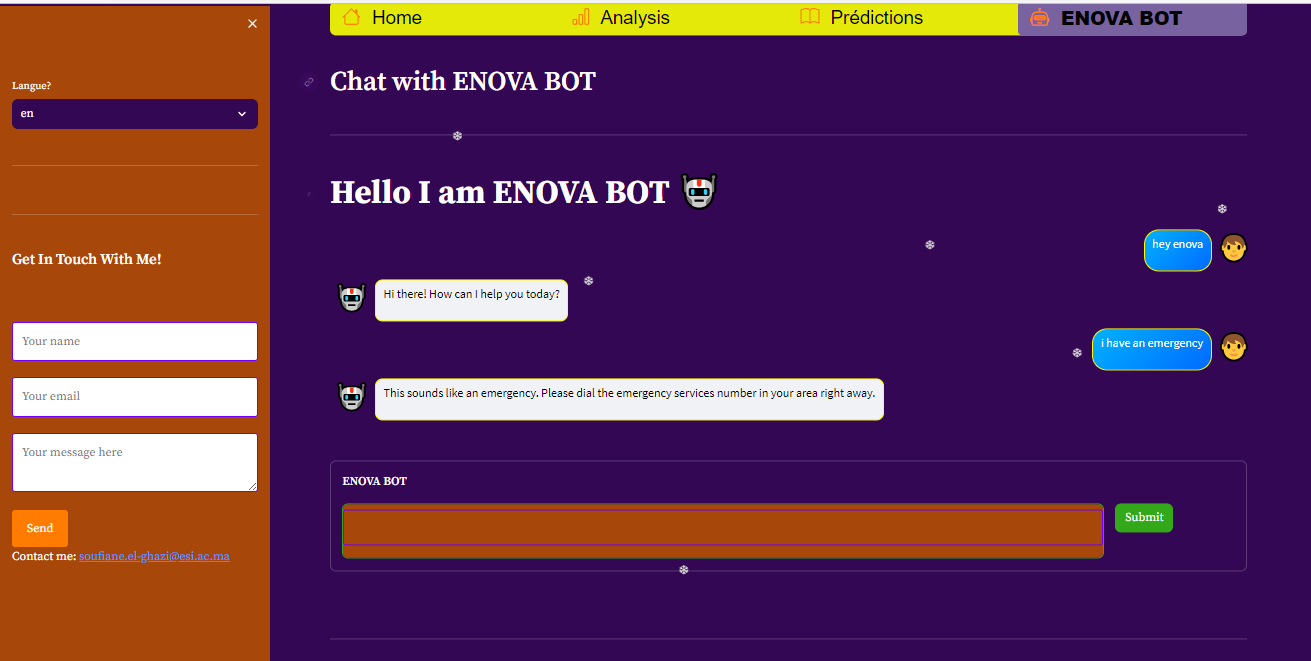

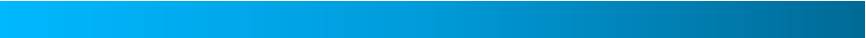